In [1]:
#importing libraries
import math
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from keras.metrics import RootMeanSquaredError
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
%store -r wheat_price_history_df
df = wheat_price_history_df
df

,Date,Last,Settlement Price,Change,% Change,Bid,Ask,Open Interest,CVol,Open,High,Low
1,2020-07-31,5.3075,5.3125,0.0175,0.330500,5.3050,5.3050,185655,44131.0,5.2850,5.3525,5.2850
2,2020-07-30,5.2875,5.2950,-0.0325,-0.610042,5.2850,5.2900,186779,44413.0,5.3175,5.3450,5.2500
3,2020-07-29,5.3300,5.3275,0.0925,1.766953,5.3275,5.3300,185642,40067.0,5.2350,5.3325,5.2350
4,2020-07-28,5.2350,5.2350,-0.0425,-0.805306,5.2350,5.2375,186475,48774.0,5.2650,5.2975,5.1925
5,2020-07-27,5.2650,5.2775,-0.1175,-2.177943,5.2650,5.2675,186372,45729.0,5.3875,5.3900,5.2625
...,...,...,...,...,...,...,...,...,...,...,...,...
500,2018-08-07,5.6825,5.6825,-0.0625,-1.087903,5.6775,5.6825,149004,106029.0,5.7525,5.8625,5.6400
501,2018-08-06,5.7375,5.7450,0.1825,3.280899,5.7350,5.7400,159801,75848.0,5.5500,5.7625,5.5150
502,2018-08-03,5.5875,5.5625,-0.0425,-0.758252,5.5850,5.5875,169582,78469.0,5.6325,5.6775,5.5375
503,2018-08-02,5.6175,5.6050,0.0225,0.403045,5.6150,5.6200,179555,150993.0,5.5950,5.9300,5.5900


In [3]:
#Checking dtype of 'Date'
df['Date']

1     2020-07-31
2     2020-07-30
3     2020-07-29
4     2020-07-28
5     2020-07-27
         ...    
500   2018-08-07
501   2018-08-06
502   2018-08-03
503   2018-08-02
504   2018-08-01
Name: Date, Length: 504, dtype: datetime64[ns]

In [4]:
df.index = df.pop('Date')
df.head()

,Last,Settlement Price,Change,% Change,Bid,Ask,Open Interest,CVol,Open,High,Low
Date,,,,,,,,,,,
2020-07-31,5.3075,5.3125,0.0175,0.330500,5.3050,5.3050,185655,44131.0,5.2850,5.3525,5.2850
2020-07-30,5.2875,5.2950,-0.0325,-0.610042,5.2850,5.2900,186779,44413.0,5.3175,5.3450,5.2500
2020-07-29,5.3300,5.3275,0.0925,1.766953,5.3275,5.3300,185642,40067.0,5.2350,5.3325,5.2350
2020-07-28,5.2350,5.2350,-0.0425,-0.805306,5.2350,5.2375,186475,48774.0,5.2650,5.2975,5.1925
2020-07-27,5.2650,5.2775,-0.1175,-2.177943,5.2650,5.2675,186372,45729.0,5.3875,5.3900,5.2625


In [5]:
df = df.sort_values('Date')
df

,Last,Settlement Price,Change,% Change,Bid,Ask,Open Interest,CVol,Open,High,Low
Date,,,,,,,,,,,
2018-08-01,5.5925,5.5825,0.0000,0.000000,5.5875,5.5925,179246,100631.0,5.5525,5.6600,5.5075
2018-08-02,5.6175,5.6050,0.0225,0.403045,5.6150,5.6200,179555,150993.0,5.5950,5.9300,5.5900
2018-08-03,5.5875,5.5625,-0.0425,-0.758252,5.5850,5.5875,169582,78469.0,5.6325,5.6775,5.5375
2018-08-06,5.7375,5.7450,0.1825,3.280899,5.7350,5.7400,159801,75848.0,5.5500,5.7625,5.5150
2018-08-07,5.6825,5.6825,-0.0625,-1.087903,5.6775,5.6825,149004,106029.0,5.7525,5.8625,5.6400
...,...,...,...,...,...,...,...,...,...,...,...
2020-07-27,5.2650,5.2775,-0.1175,-2.177943,5.2650,5.2675,186372,45729.0,5.3875,5.3900,5.2625
2020-07-28,5.2350,5.2350,-0.0425,-0.805306,5.2350,5.2375,186475,48774.0,5.2650,5.2975,5.1925
2020-07-29,5.3300,5.3275,0.0925,1.766953,5.3275,5.3300,185642,40067.0,5.2350,5.3325,5.2350


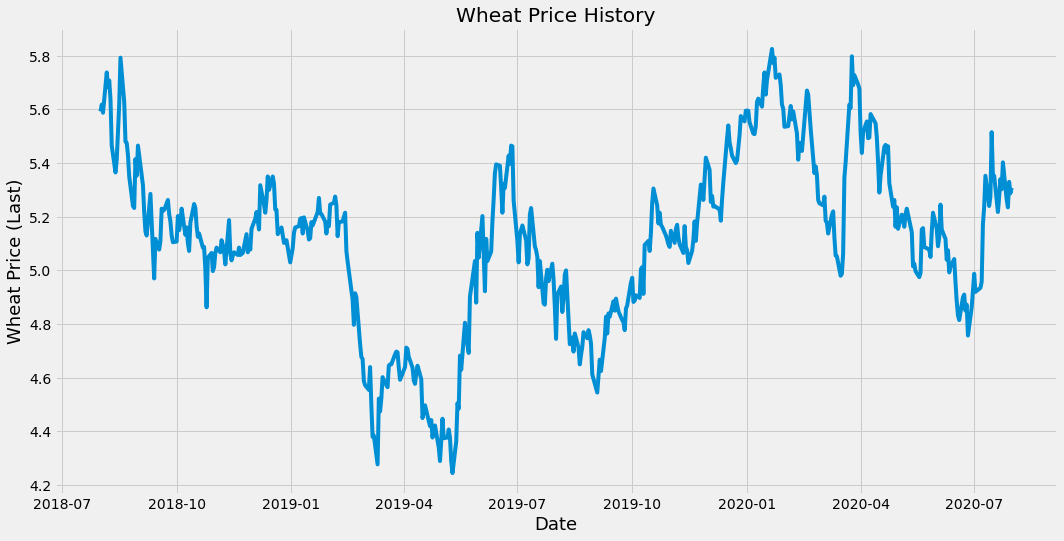

In [6]:
#Visualizing data
plt.figure(figsize = (16,8))
plt.title('Wheat Price History')
plt.plot(df['Last'])
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Wheat Price (Last)', fontsize = 18)
plt.show()

In [7]:
#Create a new dataframe
last = df.filter(['Last'])
#Convert to np array
np_last = last.values
#Get the number of rows to train the model;
training_data_len = math.ceil(len(np_last) * .8)

training_data_len

404

In [8]:
np_last.shape

(504, 1)

In [9]:
#Scale Data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(np_last)

scaled_data

array([[ 1.50658389e+00],
       [ 1.58474487e+00],
       [ 1.49095170e+00],
       [ 1.95991757e+00],
       [ 1.78796342e+00],
       [ 1.86612440e+00],
       [ 1.64727365e+00],
       [ 1.10796290e+00],
       [ 7.95318980e-01],
       [ 9.43824841e-01],
       [ 1.27991705e+00],
       [ 1.59256097e+00],
       [ 2.13187173e+00],
       [ 1.61600926e+00],
       [ 1.15485948e+00],
       [ 1.13922729e+00],
       [ 9.98537526e-01],
       [ 7.48422393e-01],
       [ 4.04514084e-01],
       [ 3.81065790e-01],
       [ 9.51640939e-01],
       [ 7.56238491e-01],
       [ 1.10796290e+00],
       [ 6.46813120e-01],
       [ 3.34169203e-01],
       [ 1.07502363e-01],
       [ 6.06057752e-02],
       [ 5.45203847e-01],
       [ 2.09111636e-01],
       [-1.50428869e-01],
       [-4.39624492e-01],
       [ 2.15252856e-02],
       [-1.03532281e-01],
       [-1.92300822e-03],
       [ 3.73249692e-01],
       [ 3.49801398e-01],
       [ 3.57617496e-01],
       [ 4.74858965e-01],
       [ 3.1

In [10]:
#Create training dataset
#Create scaled training set
train_data = scaled_data[0:training_data_len, :]
#Split the data into x_train and y_train
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i <= 61:
        print(x_train)
        print(y_train)
        print()


[array([ 1.50658389e+00,  1.58474487e+00,  1.49095170e+00,  1.95991757e+00,
        1.78796342e+00,  1.86612440e+00,  1.64727365e+00,  1.10796290e+00,
        7.95318980e-01,  9.43824841e-01,  1.27991705e+00,  1.59256097e+00,
        2.13187173e+00,  1.61600926e+00,  1.15485948e+00,  1.13922729e+00,
        9.98537526e-01,  7.48422393e-01,  4.04514084e-01,  3.81065790e-01,
        9.51640939e-01,  7.56238491e-01,  1.10796290e+00,  6.46813120e-01,
        3.34169203e-01,  1.07502363e-01,  6.06057752e-02,  5.45203847e-01,
        2.09111636e-01, -1.50428869e-01, -4.39624492e-01,  2.15252856e-02,
       -1.03532281e-01, -1.92300822e-03,  3.73249692e-01,  3.49801398e-01,
        3.57617496e-01,  4.74858965e-01,  3.10720909e-01,  2.24743832e-01,
        6.06057752e-02, -1.75552041e-02, -9.73910614e-03,  2.87272615e-01,
        1.23134559e-01,  2.09111636e-01,  3.73249692e-01,  6.84218731e-02,
        1.54398950e-01, -2.53713020e-02, -1.19164477e-01,  2.09111636e-01,
        4.27962378e-01, 

In [11]:
x_train, y_train = np.array(x_train), np.array(y_train)
x_train.shape, y_train.shape

((344, 60), (344,))

In [12]:
#Reshape data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(344, 60, 1)

In [13]:
#Build LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape = (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25, activation='relu'))
model.add(Dense(1))

In [14]:
#Compile the model
model.compile(optimizer='adam', loss = 'mean_squared_error', metrics = [RootMeanSquaredError()])

In [15]:
history = model.fit(x_train,y_train, batch_size = 1, epochs = 5, validation_split = 0.1)

Epoch 1/5
309/309 [==============================] - 13s 29ms/step - loss: 0.2406 - root_mean_squared_error: 0.4905 - val_loss: 0.3155 - val_root_mean_squared_error: 0.5617
Epoch 2/5
309/309 [==============================] - 9s 29ms/step - loss: 0.1273 - root_mean_squared_error: 0.3568 - val_loss: 0.2826 - val_root_mean_squared_error: 0.5316
Epoch 3/5
309/309 [==============================] - 7s 23ms/step - loss: 0.1038 - root_mean_squared_error: 0.3221 - val_loss: 0.1719 - val_root_mean_squared_error: 0.4146
Epoch 4/5
309/309 [==============================] - 7s 24ms/step - loss: 0.0944 - root_mean_squared_error: 0.3072 - val_loss: 0.0893 - val_root_mean_squared_error: 0.2988
Epoch 5/5
309/309 [==============================] - 7s 24ms/step - loss: 0.0848 - root_mean_squared_error: 0.2912 - val_loss: 0.0843 - val_root_mean_squared_error: 0.2904


In [16]:
#Create testing dataset
#Create a new array
test_data = scaled_data[training_data_len - 60: , :]
#Create datasets x_test, y_test
x_test = []
y_test = np_last[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

In [17]:
x_test = np.array(x_test)

In [18]:
#get the model's predicted values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

4/4 [==============================] - 1s 20ms/step


C:\Users\tusha\AppData\Local\Temp\ipykernel_18840\1739540420.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


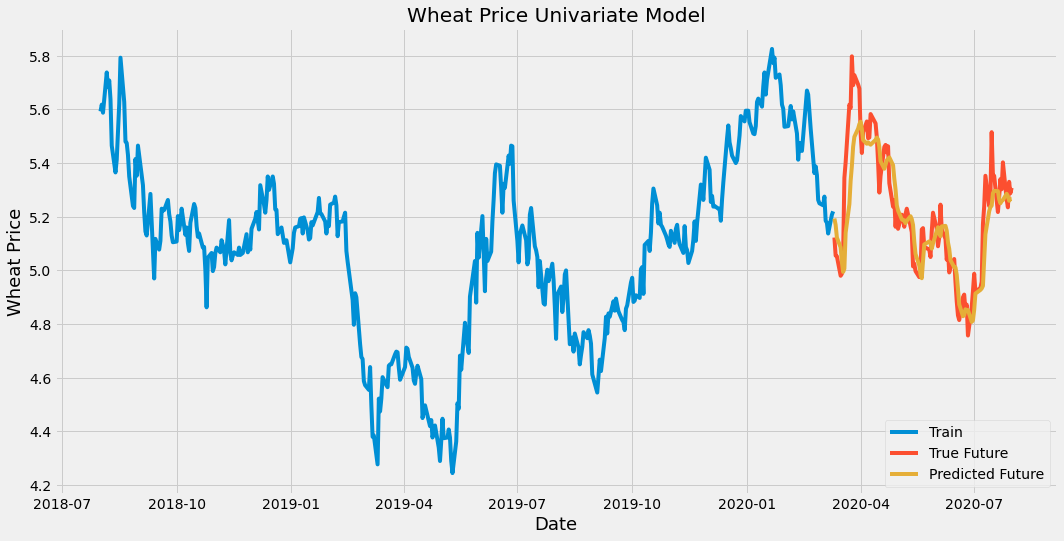

In [19]:
#Plot the data
train = last[:training_data_len]
valid = last[training_data_len:]
valid['Predictions'] = predictions

#Visualise
plt.figure(figsize = (16,8))
plt.title('Wheat Price Univariate Model')
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Wheat Price', fontsize = 18)
plt.plot(train['Last'])
plt.plot(valid[['Last', 'Predictions']])
plt.legend(['Train', 'True Future', 'Predicted Future'], loc = 'lower right')
plt.show()

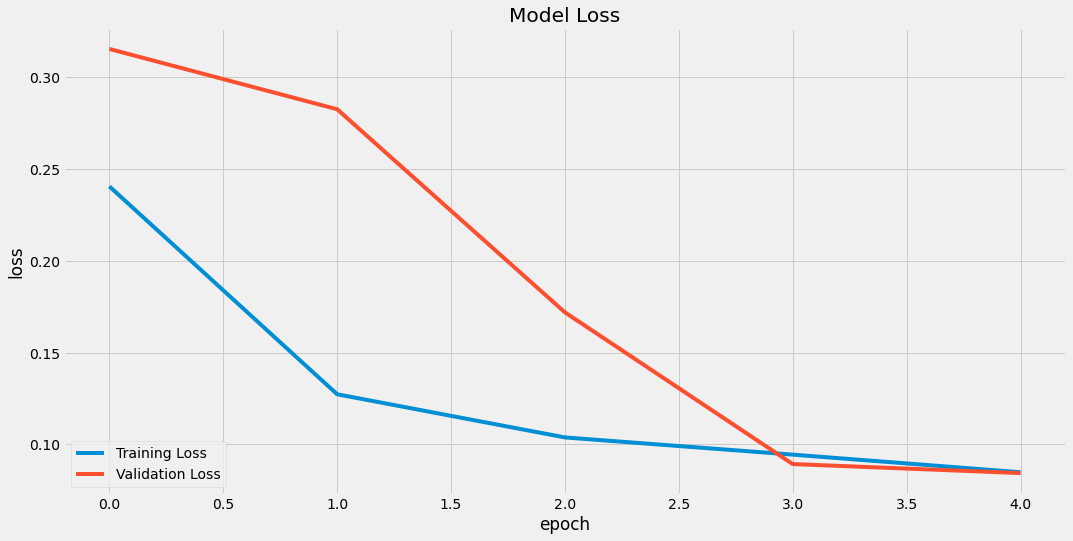

In [20]:
#Visualise loss
#Visualizing loss
plt.figure(figsize = (16,8))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Training Loss', 'Validation Loss'], loc='lower left')
plt.show()

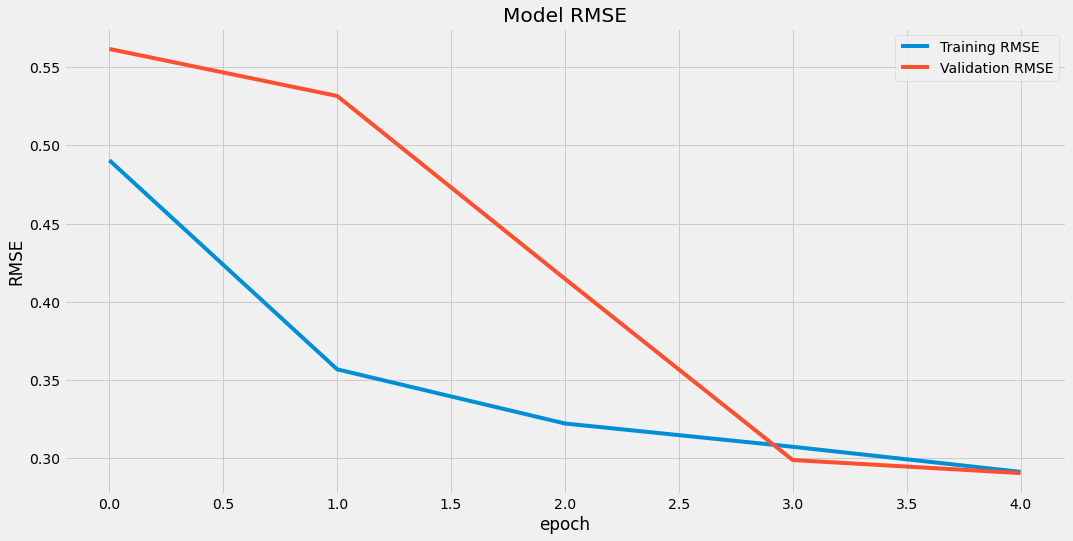

In [21]:
plt.figure(figsize = (16,8))
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('Model RMSE')
plt.xlabel('epoch')
plt.ylabel('RMSE')
plt.legend(['Training RMSE', 'Validation RMSE'], loc = 'upper right')
plt.show()